# HR Analytics Project- Understanding the Attrition in HR

### Data Description

- The actual data is in raw form (not scaled).The data has 34 quantitative input variables, and 1 quantitative output variable, and 1470 instances (observations).

### Objective

- To determine how HR Analytics help in analyzing attrition? 

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Importing the Dataset

In [50]:
# reading the CSV file into pandas dataframe
df=pd.read_csv(r'C:\Users\Dell\Documents\HR-Employee-Attrition.csv')  

In [51]:
# Read first 5 observations of the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

- Given dataset contains 1470 observations and 35 variables

###### Checking for duplicates

In [5]:
duplicate=df[df.duplicated()]
print('Duplicate Rows:')
duplicate

Duplicate Rows:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


- Hence there is no duplicate data or row in the dataset

## EDA

### Univariate Analysis

##### Data types and Description of the attributes

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

- Here, there are object type variables and int type variables. Since, attrition is object type variable, this problem statement is classification problem statement

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


- It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) and count of the continuous columns of the dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

###### Checking for missing values

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- There is no null data in the dataset

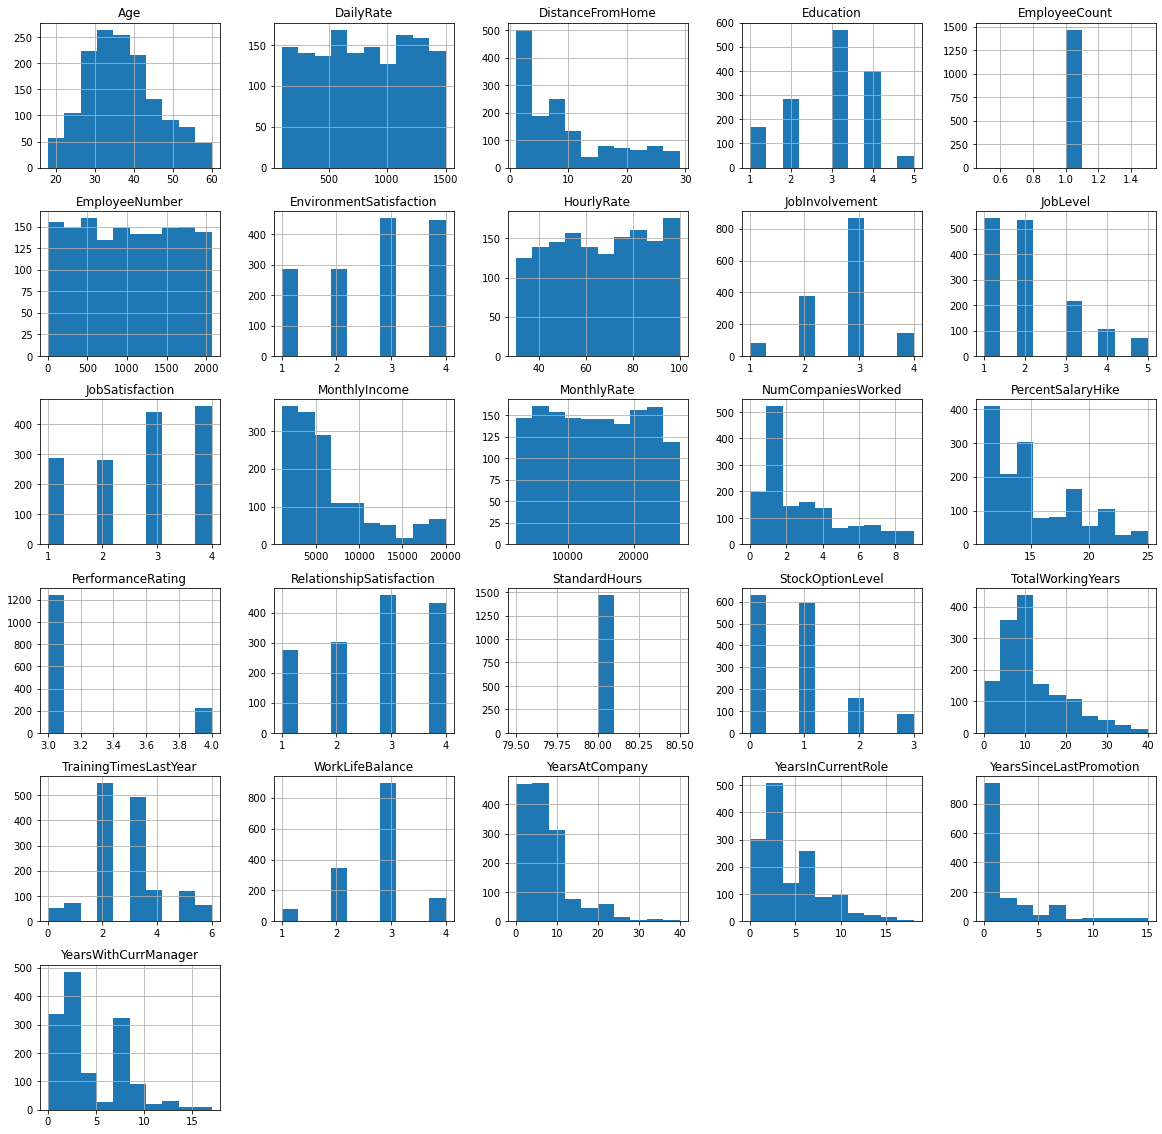

In [10]:
# Plotting the numerical variables in histograms to see their distribution.

df.hist(figsize=(20,20))
plt.show()

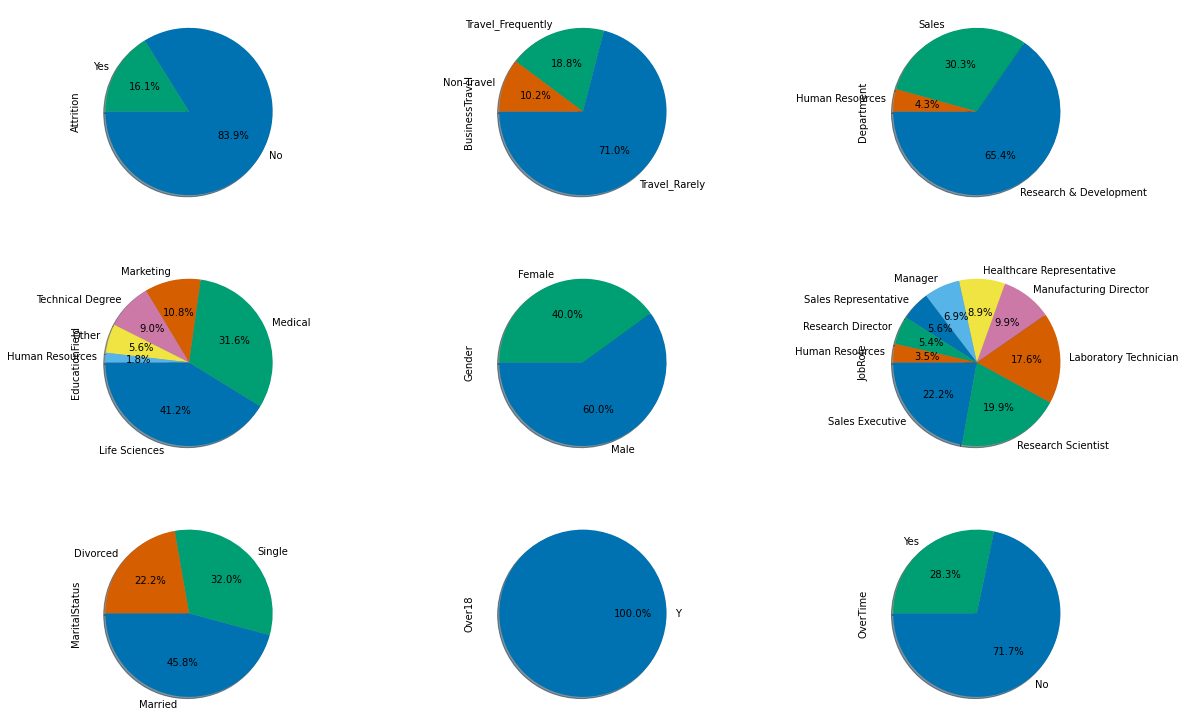

In [11]:
# Plotting the categorical variables to see their distribution

fig=plt.figure(figsize=(20,50))
plt.style.use('seaborn-colorblind')
for i in range(len((df.select_dtypes(include='object')).columns)):
    fig.add_subplot(11,3,i+1)
    df.select_dtypes(include='object').iloc[:,i].value_counts().plot(kind="pie",subplots=True,autopct='%1.1f%%',
        shadow=True, startangle=180)

In [52]:
# Dropping variables that just have one value.

df.drop(['EmployeeCount','StandardHours','EmployeeNumber','Over18'],axis=1,inplace=True)
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


- We can find that the columns that have one value were dropped

###### Let's see if attrition is affected by Relationship satisfaction,environment satisfaction, job satisfaction and work life balance

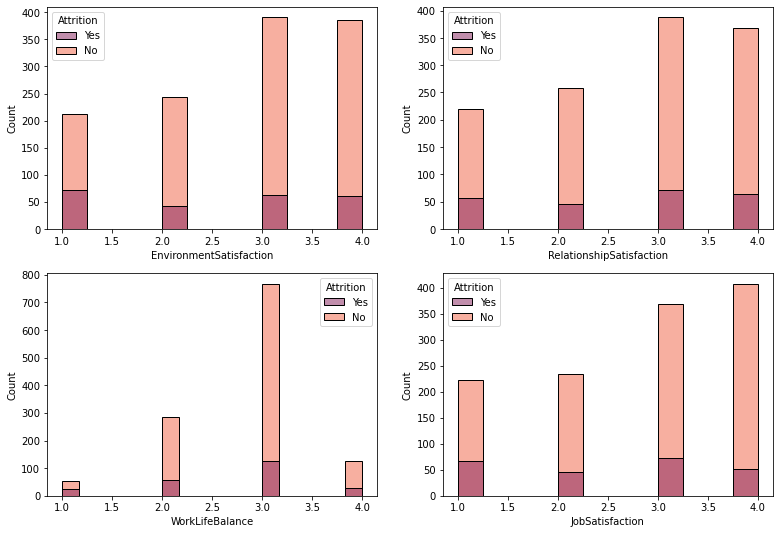

In [13]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(13, 9))

ax1 = sns.histplot(x='EnvironmentSatisfaction', hue = 'Attrition', data=df, ax=axs[0, 0], palette='rocket')
ax2 = sns.histplot(x='RelationshipSatisfaction', hue = 'Attrition', data=df, ax=axs[0, 1], palette='rocket')
ax3 = sns.histplot(x='WorkLifeBalance', hue = 'Attrition', data=df, ax=axs[1, 0], palette='rocket')
ax4 = sns.histplot(x='JobSatisfaction', hue = 'Attrition', data=df, ax=axs[1, 1], palette='rocket')

for ax in axs.flatten():
    plt.sca(ax)
    
plt.show()

- Environment Satisfaction : No difference of attrition between worker with lowest and highest environment satisfaction
- Relationship Satisfaciton : No difference of attrition between worker with lowest and highest Relationship satisfaction
- Work Life Balance : Surprisingly highest attrition came from woker with high work life balance score
- Job Satisfaction : No difference of attrition between worker with lowest and highest Job Satisfaction

###### Let's see if attrition is caused due to less hourly rate,no promotion since few years, stock option level

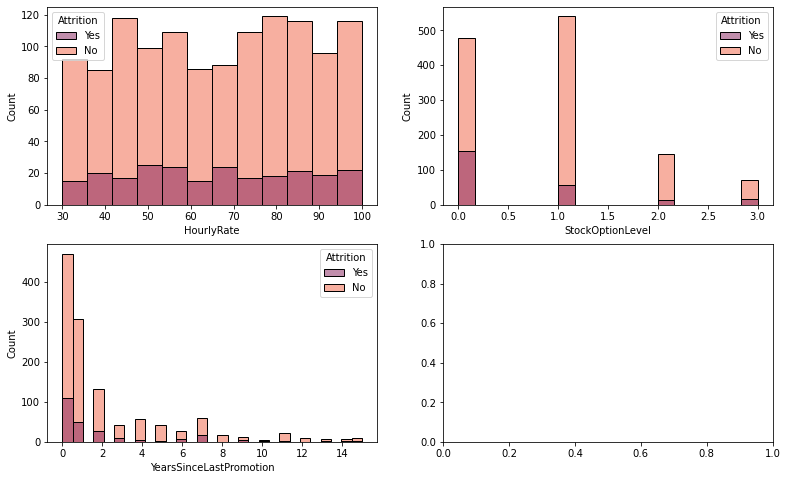

In [14]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(13,8))

ax1 = sns.histplot(x='HourlyRate', hue = 'Attrition', data=df, ax=axs[0, 0], palette='rocket')
ax2 = sns.histplot(x='StockOptionLevel', hue = 'Attrition', data=df, ax=axs[0, 1], palette='rocket')
ax3 = sns.histplot(x='YearsSinceLastPromotion', hue = 'Attrition', data=df, ax=axs[1,0], palette='rocket')

for ax in axs.flatten():
    plt.sca(ax)
    
plt.show()

- Hourly Rate : No significance difference of attrition between worker's hourly rate
- Stock Option Level : Attrition significantly high on worker without given stock Options (Level 0)
- Year Since Last Promotion : Attrition significantly high on worker who never given a promotion (Year 0)

###### Let's see if attrition is caused because they were working for many years or working in same role

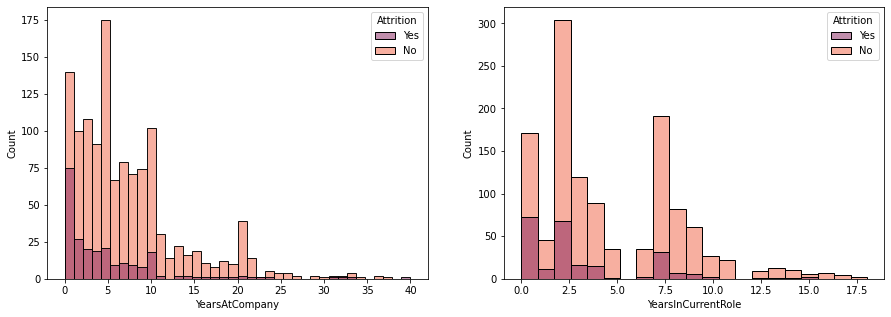

In [15]:
fig, axs = plt.subplots(ncols=2, nrows=1,figsize=(15,5))

ax1 = sns.histplot(x='YearsAtCompany', hue = 'Attrition', data=df, ax=axs[0], palette='rocket')
ax2 = sns.histplot(x='YearsInCurrentRole', hue = 'Attrition', data=df, ax=axs[1], palette='rocket')

for ax in axs.flatten():
    plt.sca(ax)    
plt.show()

- Years at Company : Attrition was significantly high on relatively new worker
- Years at Current Role : Attrtition was significantly high on woker with 0 & 2.5 years.

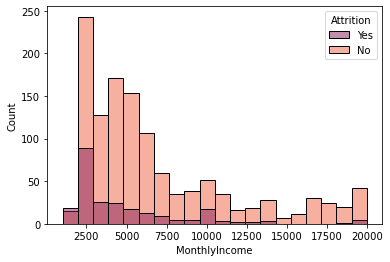

In [16]:
fig, axs = plt.figsize=(10, 5)
ax = sns.histplot(x='MonthlyIncome', hue='Attrition', data=df, palette='rocket')

- We find that attrition is high on employees with lower income

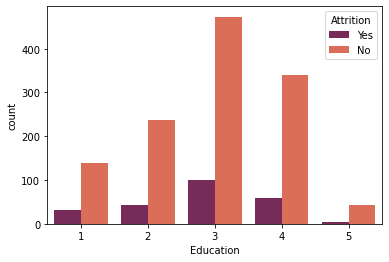

In [17]:
fig, axs = plt.figsize=(10, 5)
ax = sns.countplot(x='Education', hue='Attrition', data=df, palette='rocket')

- Attrition is relatively high on worker with education level 3

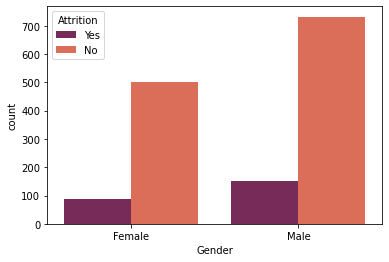

In [18]:
fig, axs = plt.figsize=(10, 5)
ax = sns.countplot(x='Gender', hue='Attrition', data=df, palette='rocket')

- We find that attrition is significantly high on male person

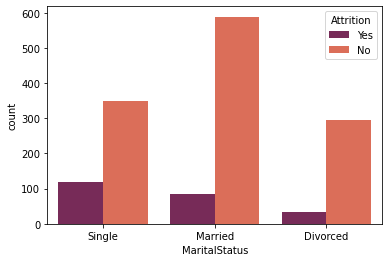

In [19]:
fig, axs = plt.figsize=(10, 5)
ax = sns.countplot(x='MaritalStatus', hue='Attrition', data=df, palette='rocket')

- Attrition is high on single worker

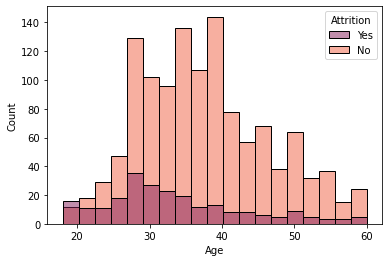

In [20]:
fig, axs = plt.figsize=(10, 5)
ax = sns.histplot(x='Age', hue='Attrition', data=df, palette='rocket')

- Attrition is relatively high between the age group of 30 and 40

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

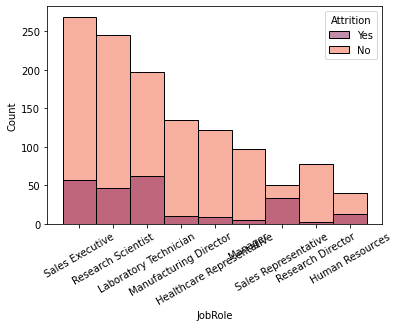

In [21]:
fig, axs = plt.figsize=(10, 5)
ax = sns.histplot(x='JobRole', hue='Attrition', data=df, palette='rocket')
plt.xticks(rotation = 30)

- Attrition is relatively high in sales Executive, Research scientist, Laboratory technician, Sales representative

##### Insights from the analysis

- The worker with high work life balance score tend to leave the company more
- Attrition is significantly high for worker who doesn't got stock option and didn't get any promotion
- Employee attrition was high for new workers rather than senior worker
- Employees with less years in current role tend to leave more
- Relatively young and low monthly income tend to leaving the company more
- Single male who are aged between 30 and 40 tend to leave the company more

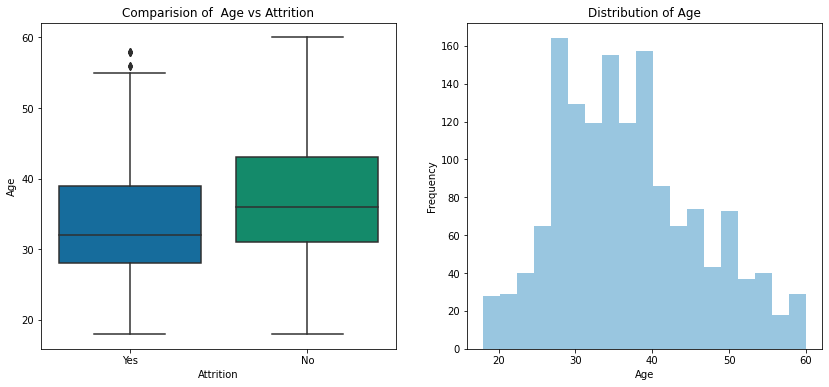

In [22]:
# we are checking the distribution of employee age and its related to attrition or not

fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

#boxplot for comparison
sns.boxplot(x = "Attrition", y ="Age" , data=df, ax=ax[0])
ax[0].set_title("Comparision of  Age vs Attrition")
    
#distribution plot
ax[1].set_title("Distribution of Age")
ax[1].set_ylabel("Frequency")
sns.distplot(a = df['Age'], ax=ax[1], kde=False)
    
plt.show()

- We find from the box plot that the people who left the company are below 40 years only
- The median age of employees is between 30 and 40 

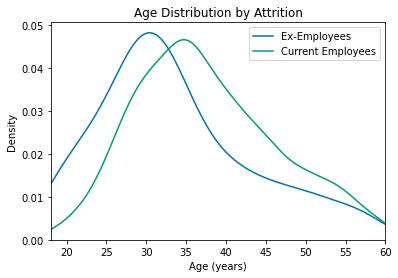

In [23]:
sns.kdeplot(data = df[df["Attrition"] == "Yes"], x = "Age",
    label = "Ex-Employees")

sns.kdeplot(data = df[df["Attrition"] == "No"],x = "Age",
    label = "Current Employees")

plt.xlim([18, 60])
plt.xlabel("Age (years)")
plt.ylabel("Density")
plt.title("Age Distribution by Attrition")
plt.legend()
plt.show()

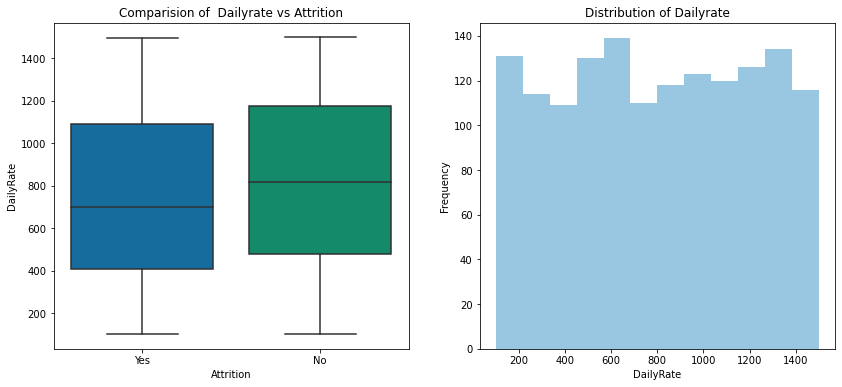

In [24]:
# we are checking the distribution of employee daily rate and its related to attrition or not

fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

#boxplot for comparison
sns.boxplot(x = "Attrition", y ="DailyRate" , data=df, ax=ax[0])
ax[0].set_title("Comparision of  Dailyrate vs Attrition")
    
#distribution plot
ax[1].set_title("Distribution of Dailyrate")
ax[1].set_ylabel("Frequency")
sns.distplot(a = df['DailyRate'], ax=ax[1], kde=False)
    
plt.show()

- Employee working with lower daily rates are more prone to leave the company than the employees with higher daily rate

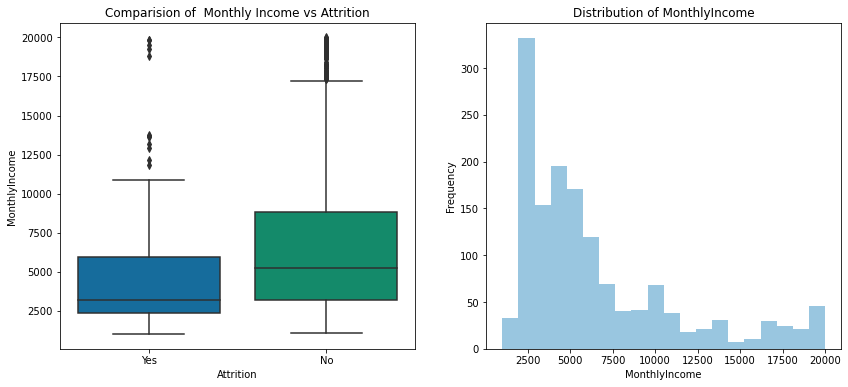

In [25]:
# we are checking the distribution of employee monthly income and its related to attrition or not

fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

#boxplot for comparison
sns.boxplot(x = "Attrition", y ="MonthlyIncome" , data=df, ax=ax[0])
ax[0].set_title("Comparision of  Monthly Income vs Attrition")
    
#distribution plot
ax[1].set_title("Distribution of MonthlyIncome")
ax[1].set_ylabel("Frequency")
sns.distplot(a = df["MonthlyIncome"], ax=ax[1], kde=False)
    
plt.show()

- Employee working with lower monthly income are more prone to leave the company than the employees with higher monthly income

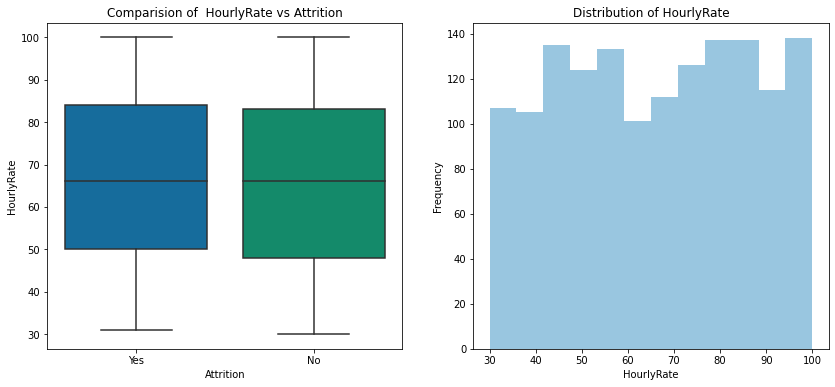

In [26]:
# we are checking the distribution of employee hourly rate and its related to attrition or not

fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

#boxplot for comparison
sns.boxplot(x = "Attrition", y ="HourlyRate" , data=df, ax=ax[0])
ax[0].set_title("Comparision of  HourlyRate vs Attrition")
    
#distribution plot
ax[1].set_title("Distribution of HourlyRate")
ax[1].set_ylabel("Frequency")
sns.distplot(a = df["HourlyRate"], ax=ax[1], kde=False)
    
plt.show()

- We see that there is no difference in hourly rate and attrition. So,hourly rate is not significant to attrition.

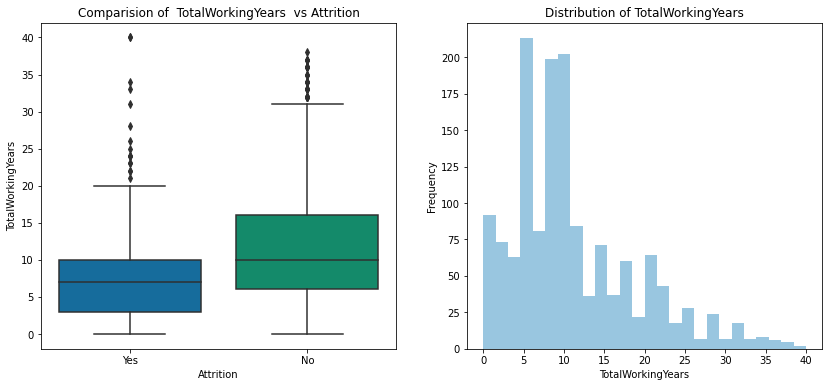

In [27]:
# we are checking the distribution of employee total working hours and its related to attrition or not

fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

#boxplot for comparison
sns.boxplot(x = "Attrition", y ="TotalWorkingYears" , data=df, ax=ax[0])
ax[0].set_title("Comparision of  TotalWorkingYears  vs Attrition")
    
#distribution plot
ax[1].set_title("Distribution of TotalWorkingYears")
ax[1].set_ylabel("Frequency")
sns.distplot(a = df["TotalWorkingYears"], ax=ax[1], kde=False)
    
plt.show()

- Employee with less working hours tend to leave but they are lesser than the people who are staying in the company

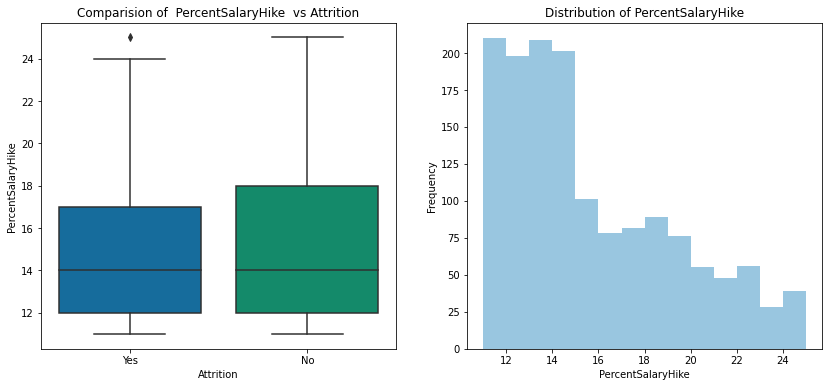

In [28]:
# we are checking the distribution of employee percent salary hike and its related to attrition or not

fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

#boxplot for comparison
sns.boxplot(x = "Attrition", y ="PercentSalaryHike" , data=df, ax=ax[0])
ax[0].set_title("Comparision of  PercentSalaryHike  vs Attrition")
    
#distribution plot
ax[1].set_title("Distribution of PercentSalaryHike")
ax[1].set_ylabel("Frequency")
sns.distplot(a = df["PercentSalaryHike"], ax=ax[1], kde=False)
    
plt.show()

- Employees with less percent salary hike are tend to leave the company, but when good percent salary hike is offered, employees are not leaving the company.

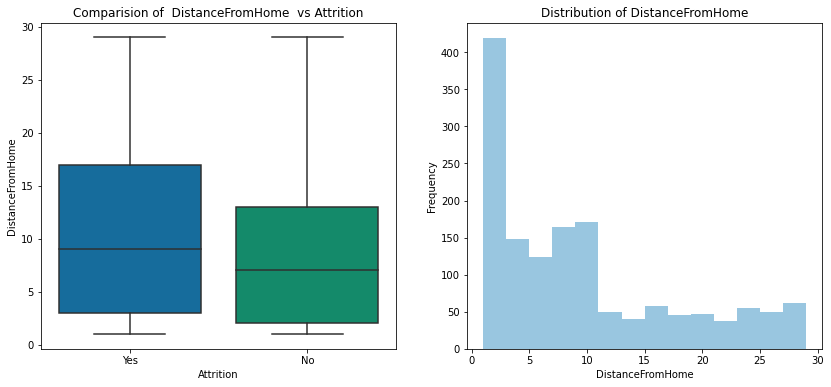

In [29]:
# we are checking the distribution of employee distance from home and its related to attrition or not

fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

#boxplot for comparison
sns.boxplot(x = "Attrition", y ="DistanceFromHome" , data=df, ax=ax[0])
ax[0].set_title("Comparision of  DistanceFromHome  vs Attrition")
    
#distribution plot
ax[1].set_title("Distribution of DistanceFromHome")
ax[1].set_ylabel("Frequency")
sns.distplot(a = df["DistanceFromHome"], ax=ax[1], kde=False)
    
plt.show()

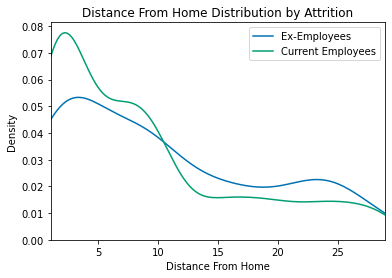

In [30]:
sns.kdeplot(data = df[df["Attrition"] == "Yes"], x = "DistanceFromHome",
    label = "Ex-Employees")

sns.kdeplot(data = df[df["Attrition"] == "No"],x = "DistanceFromHome",
    label = "Current Employees")
plt.xlim(1, 29)
plt.legend()
plt.xlabel("Distance From Home")
plt.ylabel("Density")
plt.title("Distance From Home Distribution by Attrition")
plt.show()

- With increase in distance from home, attrition rate also increases, there are more people who reside near office.

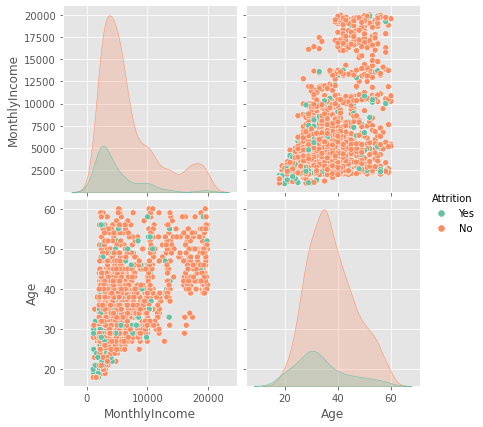

In [31]:
# The relationship between age, monthly income and attrition
plt.style.use('ggplot')
g = sns.pairplot(df, vars=["MonthlyIncome", "Age"],hue="Attrition", palette = 'Set2' ,height=3)

- Younger employees tend more to attrition as they are not attached to a stable life and have much more opportunitioes, unlike the older employees.

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

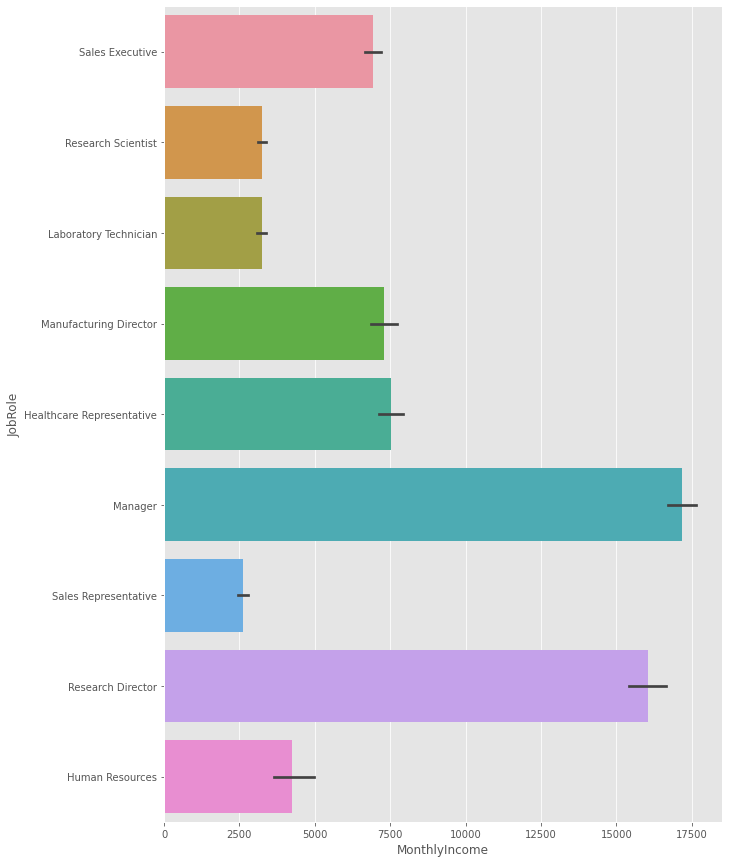

In [32]:
# Let's see the Job Role vs. Monthly Income
plt.figure(figsize = [10,15])
sns.barplot(x = df['MonthlyIncome'] , y = df['JobRole'])

- Manager and Research director are receiving the more salary 

In [54]:
#Let's replace Yes and No in Attrition with 1 and 0

Num_val = {'Yes':1, 'No':0}
df['Attrition'] = df["Attrition"].apply(lambda x: Num_val[x])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [55]:
#Unique data in each column

for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of unique values 2
RelationshipSatisfaction: Number of unique values 4
StockOptionLevel: Number of unique values 4
TotalWorkin

###### Data Processing
- Converting categorical data into numerical data

In [56]:
# There are many encoding techniques. We use label encoder to convert the categorical data into numerical data

from sklearn.preprocessing import LabelEncoder

In [57]:
def LE_column():
 for column in df.columns:
  if df[column].dtype== object:
     df[column] = LabelEncoder().fit_transform(df[column])

 return df.head()

In [58]:
LE_column()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [59]:
df.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

- From the above we find that all object type variables are converted to int type

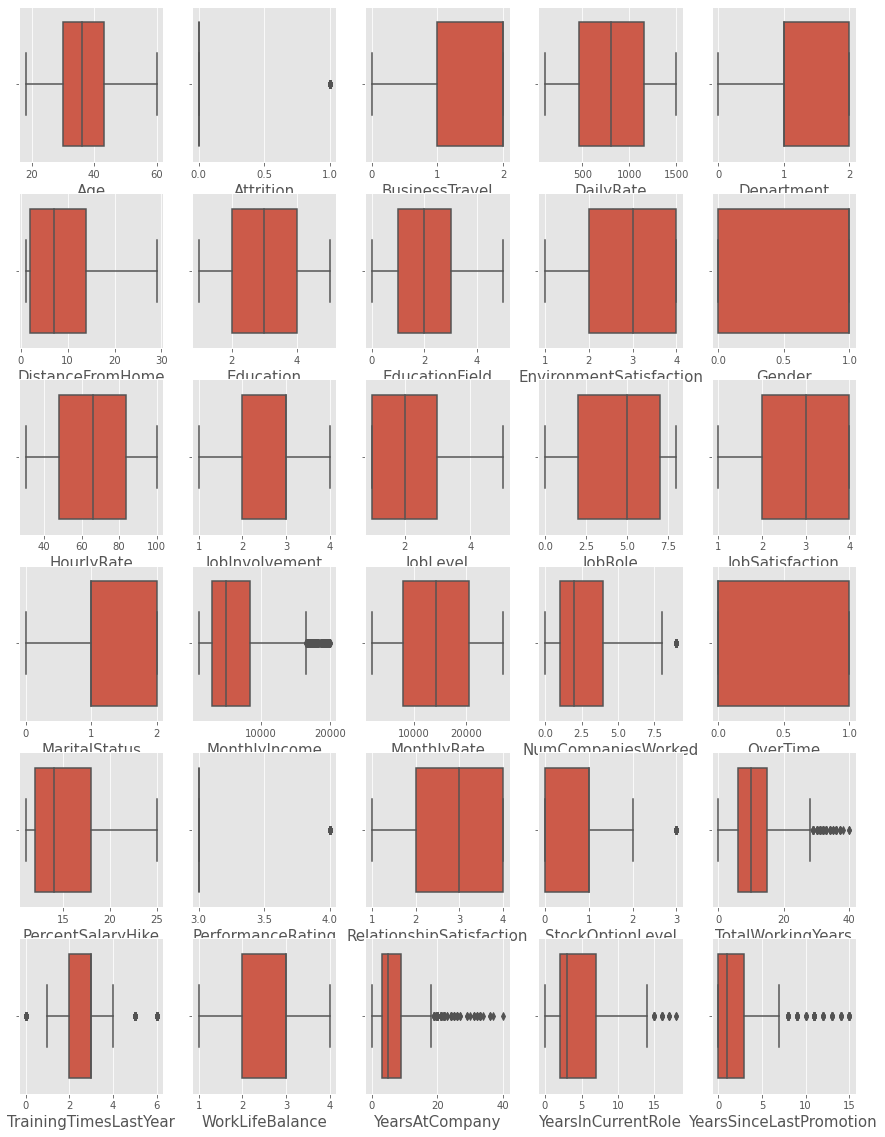

In [67]:
# Boxplots of all the columns

plt.figure(figsize=(15,20))
plotnumber=1
for column in df:
    if plotnumber<=30:
        ax=plt.subplot(6,5,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [78]:
#Creating a function to drop the outliers in the columns
def drop_outliers(df,col_name):
    iqr=1.5+(np.percentile(df[col_name],75)-np.percentile(df[col_name],25))
    df.drop(df[df[col_name]>(iqr+np.percentile(df[col_name],75))].index,inplace=True)
    df.drop(df[df[col_name]<(np.percentile(df[col_name],25)-iqr)].index,inplace=True)
    sns.boxplot(df[col_name])
    plt.title('after removing outliers')
    plt.show()

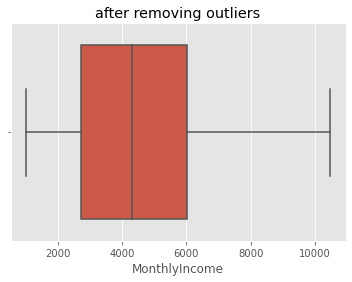

In [71]:
drop_outliers(df,'MonthlyIncome')

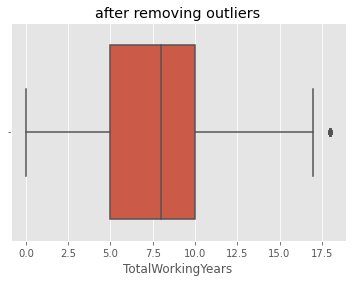

In [72]:
drop_outliers(df,'TotalWorkingYears')

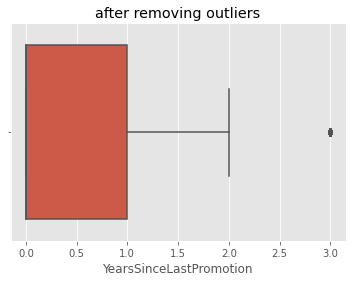

In [79]:
drop_outliers(df,'YearsSinceLastPromotion')

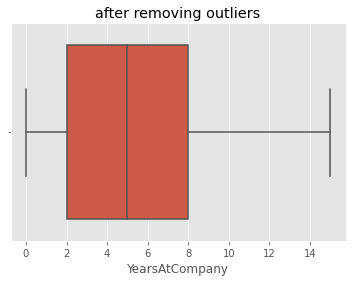

In [73]:
drop_outliers(df,'YearsAtCompany')

- I have imputed outliers with median because even if variables contain outliers median will not be effected. Hence outliers were removed from the data

<AxesSubplot:>

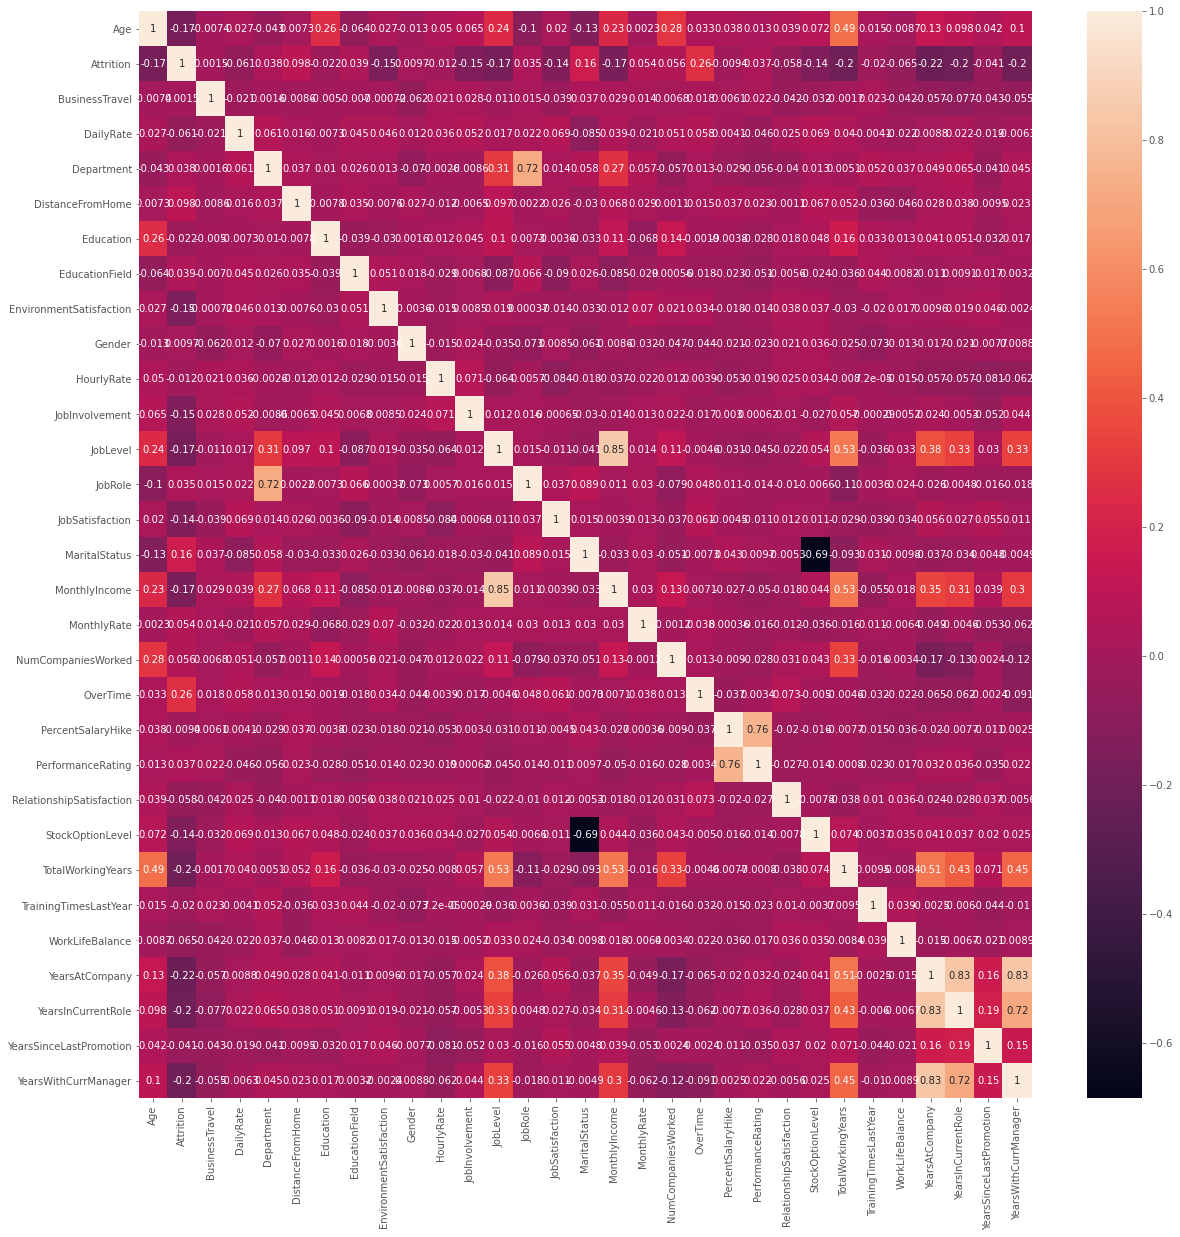

In [80]:
#correlation map

correlation = df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlation, annot = True)

- We find that Job level is strongly correlated with total working hours 
- Monthly income is strongly correlated with Job level
- Monthly income is strongly correlated with total working hours
- Age is stongly correlated with monthly income

###### Splitting the data into train and test

In [86]:
from sklearn.model_selection import train_test_split

x = df.drop(['Attrition'],axis=1)
y = df['Attrition']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Building the Models

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix ,f1_score
from sklearn.metrics import classification_report, roc_auc_score, recall_score, precision_score,roc_curve

In [133]:
#Defining a function to check the scores,confusion matrix and roc curve of the models
def evaluate_model(model, x_train, x_test, y_train, y_test):    
    y_pred = model.predict(x_test)

    #Calculating Details
    model_train_acc = round(model.score(x_train, y_train) * 100, 2)
    model_test_acc= round(model.score(x_test, y_test) * 100, 2)
    print('Train Score is : ', model_train_acc)
    print('Test Score is : ' , model_test_acc)

    #Calculating Prediction
    accuracy= accuracy_score(y_test , y_pred )
    print('Accuracy Score is  = ', accuracy )
    f1_score= metrics.f1_score(y_test, y_pred,average='micro')
    print('F1 Score: ', f1_score)
    cm = confusion_matrix(y_test , y_pred )
    print('confusion matrix \n',  cm)
    sns.heatmap(cm, center = True)
    plt.show()
    #Check precision, recall, f1-score
    print( classification_report(y_test, model.predict(x_test)))

    #plotting roc curve
    pred_prob=model.predict_proba(x_test)
    fpr,tpr,thresh=roc_curve(y_test,pred_prob[:,1],pos_label=1)
    random_probs=[0 for i in range(len(y_test))]
    p_fpr,p_tpr,_=roc_curve(y_test,random_probs,pos_label=1)
    plt.style.use('seaborn')

    plt.plot(fpr,tpr,linestyle='--',color='orange')
    plt.plot(p_fpr,p_tpr,linestyle='--',color='blue')
    plt.title('ROC curve')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend(loc='best')
    plt.show()

#### ==========LOGISTIC REGRESSION===========

==========LOGISTIC REGRESSION===========
Train Score is :  85.38
Test Score is :  85.25
Accuracy Score is  =  0.8524590163934426
F1 Score:  0.8524590163934426
confusion matrix 
 [[147   7]
 [ 20   9]]


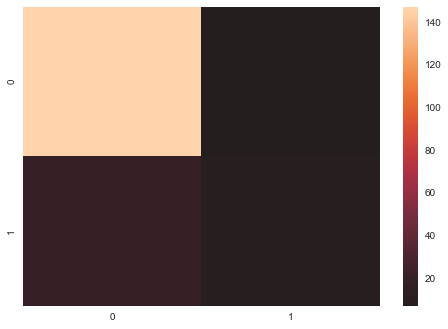

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       154
           1       0.56      0.31      0.40        29

    accuracy                           0.85       183
   macro avg       0.72      0.63      0.66       183
weighted avg       0.83      0.85      0.83       183


No handles with labels found to put in legend.


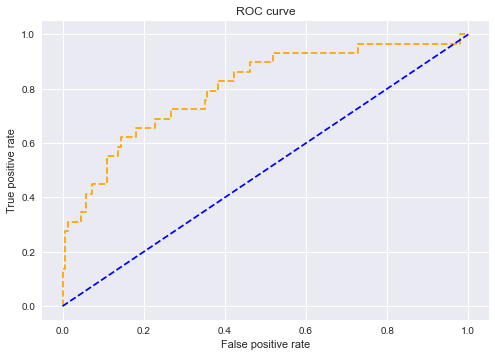

In [175]:
LR = LogisticRegression(max_iter=3000)
LR.fit(x_train, y_train)
print("==========LOGISTIC REGRESSION===========")
evaluate_model(LR,x_train, x_test, y_train, y_test)

#### ==========K NEIGHBOR CLASSIFIER===========

==========K NEIGHBOR CLASSIFIER===========
Train Score is :  81.97
Test Score is :  81.97
Accuracy Score is  =  0.819672131147541
F1 Score:  0.819672131147541
confusion matrix 
 [[146   8]
 [ 25   4]]


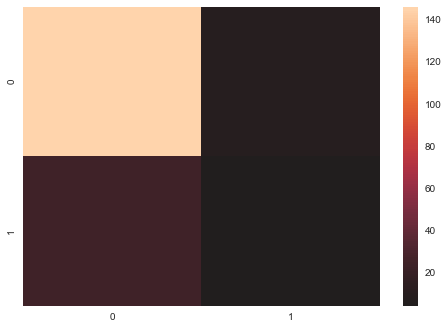

No handles with labels found to put in legend.


              precision    recall  f1-score   support

           0       0.85      0.95      0.90       154
           1       0.33      0.14      0.20        29

    accuracy                           0.82       183
   macro avg       0.59      0.54      0.55       183
weighted avg       0.77      0.82      0.79       183



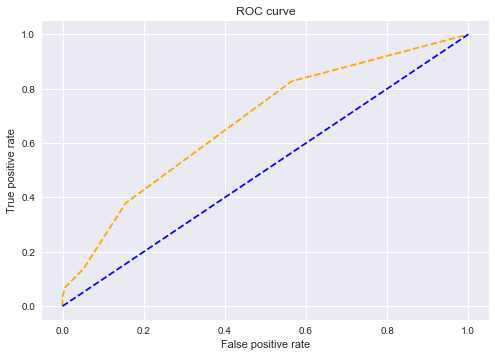

In [176]:
KNN= KNeighborsClassifier()
KNN.fit(x_train, y_train)
print("==========K NEIGHBOR CLASSIFIER===========")
evaluate_model(KNN,x_train, x_test, y_train, y_test)

#### ==========ADA BOOST CLASSIFIER===========

==========ADA BOOST CLASSIFIER===========
Train Score is :  89.34
Test Score is :  87.43
Accuracy Score is  =  0.8743169398907104
F1 Score:  0.8743169398907104
confusion matrix 
 [[146   8]
 [ 15  14]]


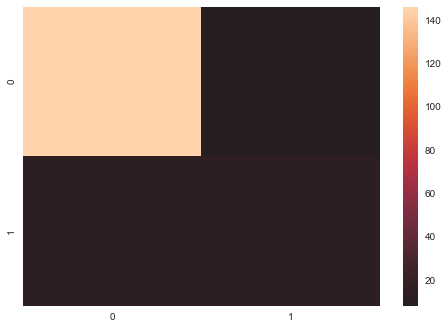

No handles with labels found to put in legend.


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       154
           1       0.64      0.48      0.55        29

    accuracy                           0.87       183
   macro avg       0.77      0.72      0.74       183
weighted avg       0.86      0.87      0.87       183



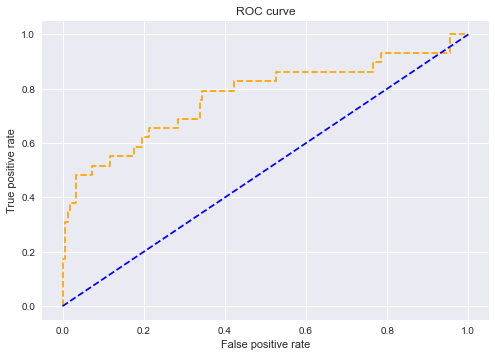

In [177]:
AB= AdaBoostClassifier()
AB.fit(x_train, y_train)
print("==========ADA BOOST CLASSIFIER===========")
evaluate_model(AB,x_train, x_test, y_train, y_test)

#### ==========DECISION TREE CLASSIFIER===========

==========DECISION TREE CLASSIFIER===========
Train Score is :  100.0
Test Score is :  73.77
Accuracy Score is  =  0.7377049180327869
F1 Score:  0.7377049180327869
confusion matrix 
 [[123  31]
 [ 17  12]]


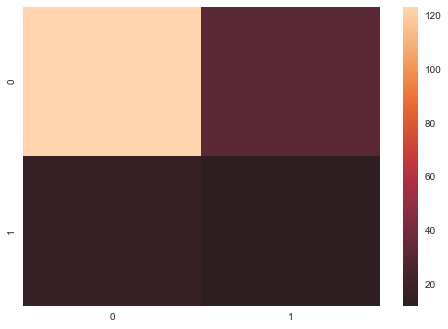

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       154
           1       0.28      0.41      0.33        29

    accuracy                           0.74       183
   macro avg       0.58      0.61      0.59       183
weighted avg       0.78      0.74      0.76       183



No handles with labels found to put in legend.


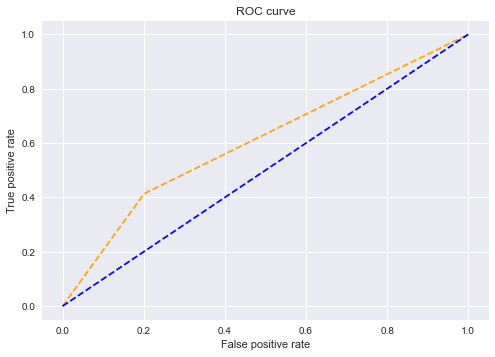

In [178]:
DT= DecisionTreeClassifier()
DT.fit(x_train, y_train)
print("==========DECISION TREE CLASSIFIER===========")
evaluate_model(DT,x_train, x_test, y_train, y_test)

###### Performing hyperparameter tuning on Decision Tree Classifier

In [179]:
dttuning=DecisionTreeClassifier()
#lets tune the parameters using GridSearchCv
params={'criterion':['gini','entropy'],
       'splitter':['best','random'],
       'max_depth':[50,60,70,80]}

grd=GridSearchCV(dttuning,param_grid=params)
grd.fit(x_train,y_train)

pred=grd.predict(x_test)
print(f'Accuracy on model: {round(accuracy_score(y_test,pred),3)}')

Accuracy on model: 0.787


- On performing hyperparameter tuning on decision tree model, the accuracy of the model has increased from 73.77% to 78.7%

#### ==========RANDOM FOREST CLASSIFIER===========

==========RANDOM FOREST CLASSIFIER===========
Train Score is :  100.0
Test Score is :  87.43
Accuracy Score is  =  0.8743169398907104
F1 Score:  0.8743169398907104
confusion matrix 
 [[152   2]
 [ 21   8]]


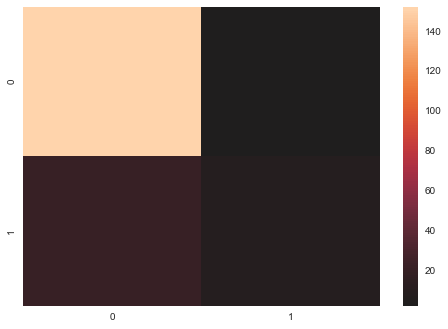

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       154
           1       0.80      0.28      0.41        29

    accuracy                           0.87       183
   macro avg       0.84      0.63      0.67       183
weighted avg       0.87      0.87      0.85       183



No handles with labels found to put in legend.


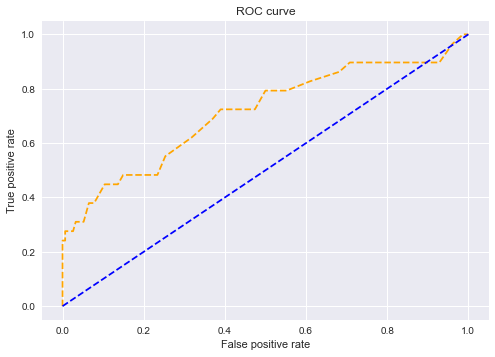

In [184]:
RF= RandomForestClassifier()
RF.fit(x_train, y_train)
print("==========RANDOM FOREST CLASSIFIER===========")
evaluate_model(RF,x_train, x_test, y_train, y_test)

###### Performing hyperparameter tuning on Random Forest Classifier

In [181]:
rf_param_grid = {"n_estimators": [300, 500, 1000],
                            "max_depth": [10, 25, 50],
                            "min_samples_leaf": [0.01, 0.05, 0.15],
                            "max_features": ["sqrt", "log2"]}
grd = GridSearchCV(RandomForestClassifier(random_state = 42), 
                                    rf_param_grid, scoring = "roc_auc", cv = 3, n_jobs = -1)
grd.fit(x_train, y_train)

print(random_forest_search.best_params_)
print(random_forest_search.best_score_)
print(random_forest_search.best_estimator_)

{'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 0.01, 'n_estimators': 1000}
0.8266447102235025
RandomForestClassifier(max_depth=25, max_features='log2', min_samples_leaf=0.01,
                       n_estimators=1000, random_state=42)


In [182]:
random_forest_tuned = RandomForestClassifier(**grd.best_params_, random_state = 42)
random_forest_tuned.fit(x_train, y_train)

pred=grd.predict(x_test)
print(f'Accuracy on model: {round(accuracy_score(y_test,pred),3)}')

Accuracy on model: 0.874


- On performing hyperparameter tuning on random forest model, the accuracy of the model reamins same 87.43%

#### ==========GAUSSIAN NB===========

==========GAUSSIAN NB===========
Train Score is :  80.19
Test Score is :  77.6
Accuracy Score is  =  0.7759562841530054
F1 Score:  0.7759562841530054
confusion matrix 
 [[127  27]
 [ 14  15]]


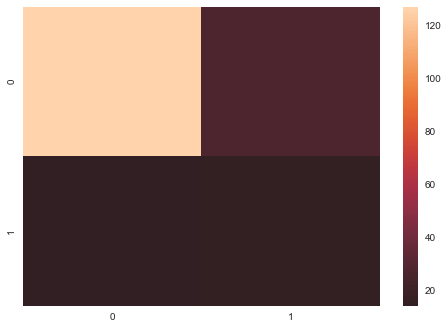

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       154
           1       0.36      0.52      0.42        29

    accuracy                           0.78       183
   macro avg       0.63      0.67      0.64       183
weighted avg       0.81      0.78      0.79       183



No handles with labels found to put in legend.


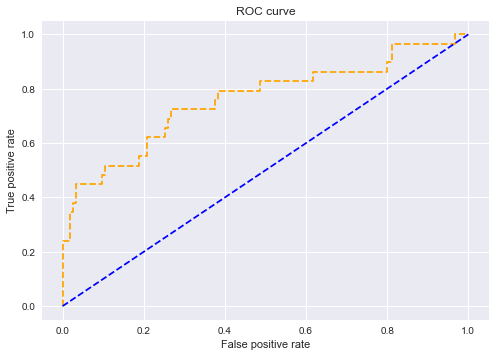

In [119]:
GNB=GaussianNB()
GNB.fit(x_train, y_train)
print("==========GAUSSIAN NB===========")
evaluate_model(GNB,x_train, x_test, y_train, y_test)

### Model Evaluation

In [186]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','KNN','Ada Boost','DecisionTree',
              'DecisionTree after tuning','RandomForest',
              'RandomForest after tuning' ,'Gaussian NB'],
    'Score': [85.25,81.97,87.43,73.77,78.7,87.43,87.4,77.6]})
               
       
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Ada Boost,87.43
5,RandomForest,87.43
6,RandomForest after tuning,87.40
0,Logistic Regression,85.25
1,KNN,81.97
4,DecisionTree after tuning,78.70
7,Gaussian NB,77.60
3,DecisionTree,73.77


- By training and building all the several models, we find that accuracy score is highest for 'Random Forest classifier' and 'Ada Boost Classifier'i.e.,87.43%. Hence these two model best fits for predicting the attrition in a company.
- Now we are considering random forest model and saving that model

#### Saving the model

In [187]:
import pickle
filename = 'Attritioninhr.pkl'
pickle.dump(RF, open(filename, 'wb'))

#### Conclusion

In [189]:
loaded_model=pickle.load(open('Attritioninhr.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

87.43169398907104


In [190]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_pred[:]],index=['Predicted','Original'])

In [191]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,173,174,175,176,177,178,179,180,181,182
Predicted,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Original,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
